In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [13]:
# !pip install --upgrade scikit-learn mlxtend

  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.


In [14]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
lr = LogisticRegression()
sel = EFS(lr,max_features=4,scoring='accuracy',cv=5)

In [21]:
model = sel.fit(df.iloc[:,:4],df['species'])

C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [22]:
model.best_score_


np.float64(0.9733333333333334)

In [23]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [24]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [27]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal_width,)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal_length, sepal_width)",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


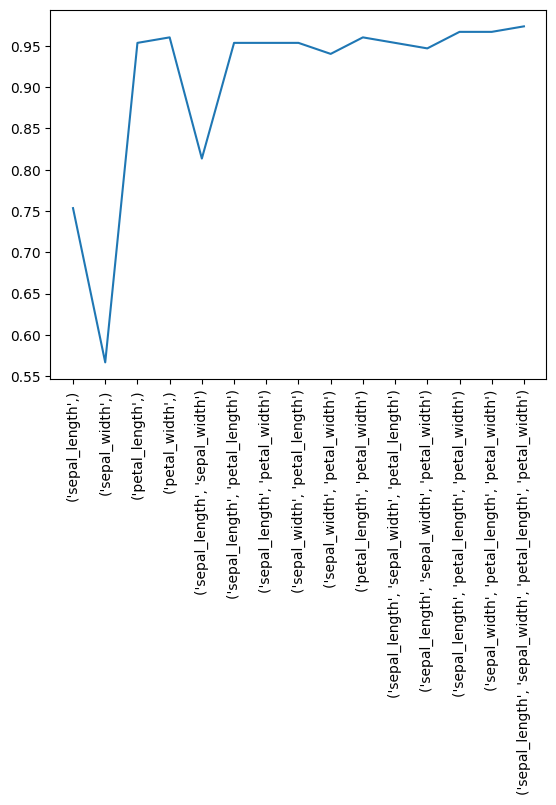

In [28]:
plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()